<br>

### Facial Recognition

hw10 option 1

First make sure you have our new library OpenCV (Open Source Computer Vision Library)

More info on the libary can be found here: https://opencv.org/

In your terminal (or in a notebook cell!), run `!pip install opencv-python`
+ only use the <tt>!</tt> if you're inside Python

THEN, run the cells below...

We have provided a new open-image function using OpenCV. There is also a new function to save images

In [24]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [45]:
# libraries!
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import seaborn as sns

# magic function to display images in the notebook
%matplotlib inline

In [46]:
def opencv_open_into_rgb( image_file_name ):
    """ open image_file_name and convert to rgb """
    image_raw = cv.imread(image_file_name, cv.IMREAD_COLOR)  # reads into BGR
    orig_num_rows, orig_num_cols, _ = image_raw.shape          # cool underscore variable!
    num_rows, num_cols, _ = image_raw.shape
    print(f"image with name {image_file_name} read with dimensions: {image_raw.shape}")
    
    # let's resize as long as any dimension is > 840...

    maxdim = max(num_rows,num_cols)
    while maxdim > 840:
        num_rows = num_rows//2  # halve!
        num_cols = num_cols//2  # halve!
        maxdim = max(num_rows,num_cols) # try again...
        
    if orig_num_rows != num_rows: # did we resize?
        print(f"resizing to rows, cols = {num_rows}, {num_cols}")
        image_raw = cv.resize(image_raw, dsize=(num_cols,num_rows), interpolation=cv.INTER_LINEAR)  # resizing
        
    # now, convert to rgb
    image_rgb = cv.cvtColor(image_raw, cv.COLOR_BGR2RGB)     # convert from BGR to RGB
    return image_rgb

In [47]:
pwd

'/Users/waverlywang/Documents/programmingpracticum/wcdataset'

In [48]:
cd ..

/Users/waverlywang/Documents/programmingpracticum


In [49]:
cd Documents

[Errno 2] No such file or directory: 'Documents'
/Users/waverlywang/Documents/programmingpracticum


In [50]:
cd programmingpracticum

[Errno 2] No such file or directory: 'programmingpracticum'
/Users/waverlywang/Documents/programmingpracticum


In [51]:
cd wcdataset

/Users/waverlywang/Documents/programmingpracticum/wcdataset


In [52]:
# img = imutils.url_to_image(fileurl)

image with name truesummercool.png read with dimensions: (750, 600, 3)


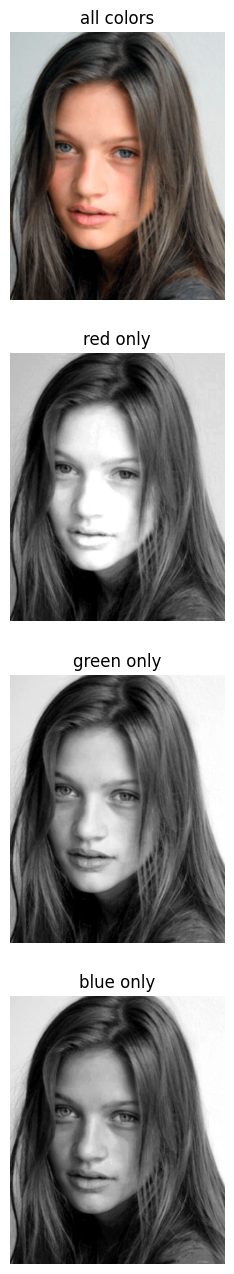

In [53]:
filename = "truesummercool.png"  # "coffee.jpg"  "flag.png"  "avengers.jpg" ... try others
# filename = "coffee.jpg" # "flag.png"  "avengers.jpg" ... try others
# filename = "flag.png" # "avengers.jpg" ... try others

image_rgb = opencv_open_into_rgb(filename) 

fig, ax = plt.subplots(4,1, figsize=(6,16))  # this means ax will be a 1x4 numpy array of axes!

ax[0].imshow(image_rgb)                     # normal image
ax[0].axis('off')  
ax[0].set_title('all colors')  

ax[1].imshow(image_rgb[:,:,0],cmap="gray")  # red-channel image
ax[1].axis('off')  
ax[1].set_title('red only') 

ax[2].imshow(image_rgb[:,:,1],cmap="gray")  # green-channel image
ax[2].axis('off')  
ax[2].set_title('green only') 

ax[3].imshow(image_rgb[:,:,2],cmap="gray")  # blue-channel image
ax[3].axis('off')  
ax[3].set_title('blue only') 

plt.show()

In [54]:
def save_rgb_image( image_rgb, new_file_name ):
    """ saves the image  image_rgb  to the (string) name, new_file_name
        add the extension you'd like, png, jpg, ... it knows many (not all)
    """
    image_bgr = cv.cvtColor(image_rgb, cv.COLOR_RGB2BGR)     # convert from BGR to RGB
    result = cv.imwrite(new_file_name,image_bgr)
    if result == True:
        print(f"image_rgb was saved to {new_file_name}")
    else:
        print(f"there was a problem saving image_rgb to {new_file_name}")

In [55]:
filename = "truesummercool.png"  # "coffee.jpg"  "flag.png"  "avengers.jpg" ... try others
image_rgb = opencv_open_into_rgb(filename) 
save_rgb_image( image_rgb, "new_image.png" )  # it needs the extension

image with name truesummercool.png read with dimensions: (750, 600, 3)
image_rgb was saved to new_image.png


<br>

#### Now we'll try the facial recognition itself...


The cell below contains the "cascades," the pre-trained, "transferred" models...

More info here:  
https://github.com/opencv/opencv/tree/master/data/haarcascades

https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades_cuda/haarcascade_profileface.xml

Run the cells to see how it works!

In [56]:
# cascPath = "./haarcascade_frontalface_default.xml"
# cascPath = "./haarcascade_frontalface_alt_tree.xml"
#cascPath = "./haarcascade_frontalface_alt.xml"
#cascPath = "./haarcascade_profileface_newer.xml"
faceCascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
# faceCascade = cv.CascadeClassifier(cascPath)

# this link helped me figure out the cascade

In [57]:
# https://stackoverflow.com/questions/59166301/python-opencv-error-with-cascadeclassifier

In [58]:
import imutils
import cv2

In [59]:


def facialrecognition(imageinput):
# Read the fileurl and return the faces
    if isinstance(imageinput, np.ndarray): #testing if numpy image
        image = imutils.resize(imageinput,width=250)
    elif isinstance(imageinput, str): # if it's a string
        if imageinput[0:6] == 'https:': #if url    
            image =  imutils.url_to_image(imageinput)
            image = imutils.resize(image,width=250) # important step to resize bc the min size of face was small in comparison to some images before. :0
        else: #it's a file
            image=cv2.imread(imageinput)

    fig, ax = plt.subplots()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')  


    ax.set_title('Color') 
    plt.show()

    image_faces_gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

    fig, ax = plt.subplots()
    ax.imshow(image_faces_gray,cmap="gray")
    ax.axis('off')  
    ax.set_title('Gray') 
    plt.show()

        # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        image_faces_gray,       # this is the input image
        scaleFactor=1.05,       # this is the scale-resolution for detecting faces
        minNeighbors=1,         # this is how many nearby-detections are needed to ok a face
        minSize=(10,10),        # this is the minimum size for a face
        flags = cv.CASCADE_SCALE_IMAGE, 
        # (standard)

    )
    print(f"Found {len(faces)} faces!")

    maximum = 0  # keep track of the confidence levels. Highest confidence level is the one with biggest bounding box.
    maxFace = 0
    for i, face in enumerate(faces):
        x,y,w,h = face
        if w*h > maximum:
            maximum = w*h
            maxFace = i
        print(f"face {i}: {face}")
    print(f"the face that is probably a face is {maxFace} with a size of {maximum}")
        
    

    image_faces_drawn_rgb = image.copy()  # copy onto which we draw the bounding boxes for the faces

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        # note that this draws on the color image!
        cv.rectangle(image_faces_drawn_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2) 

    print(f"Drawn! How does it do?")

    LoFi = []  # list of Face images

   
    for (x, y, w, h) in faces: 
        # note that this draws on the color image!
        face = image[y:y+h,x:x+h,:]  #, (x, y), (x+w, y+h), (0, 255, 0), 2)  
        LoFi.append( face )
        value = w*h
       


    # show the image!
    fig, ax = plt.subplots(figsize=(6,6)) 
    plt.imshow(cv2.cvtColor(image_faces_drawn_rgb,cv2.COLOR_BGR2RGB))
    ax.axis('off')  
    ax.set_title('FACES???') 
    plt.show()

    # printing the graph of LoFi
    print(f"There are {len(LoFi)} faces detected - they are held in the list 'LoFi'")
    print(f"Here are some of them...")

    
    fig, ax = plt.subplots(3,3)  # this means ax will be a 3x3 numpy array of axes!
    #ax[0,0].imshow(LoFi[0])
    #ax[0,0].imshow(cv2.resize(LoFi[0],dsize=(20,20)))
    ax[0,0].imshow(cv2.cvtColor(LoFi[0],cv2.COLOR_BGR2RGB))
    ax[0,0].axis('off') 
    if len(LoFi) >= 2: 
        ax[0,1].imshow(cv2.cvtColor(LoFi[1],cv2.COLOR_BGR2RGB))
        ax[0,1].axis('off')
    if len(LoFi) >= 3: 
        ax[0,2].imshow(cv2.cvtColor(LoFi[2],cv2.COLOR_BGR2RGB))
        ax[0,2].axis('off')
    if len(LoFi) >= 4: 
        ax[1,0].imshow(cv2.cvtColor(LoFi[3],cv2.COLOR_BGR2RGB))
        ax[1,0].axis('off')
    if len(LoFi) >= 5: 
        ax[1,1].imshow(cv2.cvtColor(LoFi[4],cv2.COLOR_BGR2RGB))
        ax[1,1].axis('off')
    if len(LoFi) >= 6: 
        ax[1,2].imshow(cv2.cvtColor(LoFi[5],cv2.COLOR_BGR2RGB))
        ax[1,2].axis('off')
    if len(LoFi) >= 7: 
        ax[2,0].imshow(cv2.cvtColor(LoFi[6],cv2.COLOR_BGR2RGB))
        ax[2,0].axis('off')
    if len(LoFi) >= 8: 
        ax[2,1].imshow(cv2.cvtColor(LoFi[7],cv2.COLOR_BGR2RGB))
        ax[2,1].axis('off')
    if len(LoFi) >= 9: 
        ax[2,2].imshow(cv2.cvtColor(LoFi[8],cv2.COLOR_BGR2RGB)) 
        ax[2,2].axis('off')
    plt.show()

    return LoFi[maxFace]

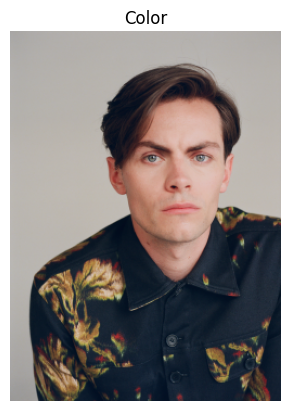

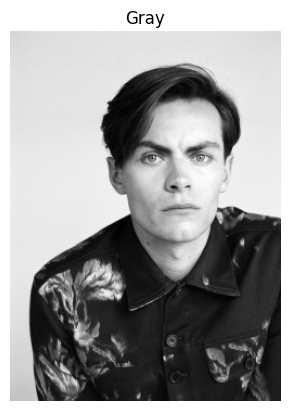

Found 1 faces!
face 0: [102  73 107 107]
the face that is probably a face is 0 with a size of 11449
Drawn! How does it do?


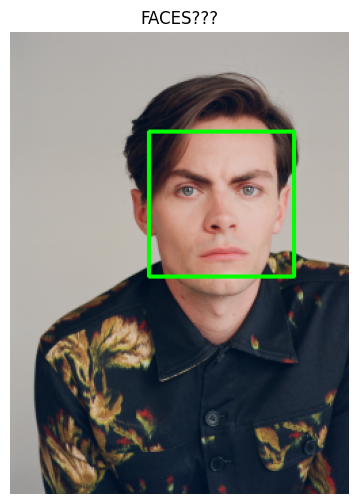

There are 1 faces detected - they are held in the list 'LoFi'
Here are some of them...


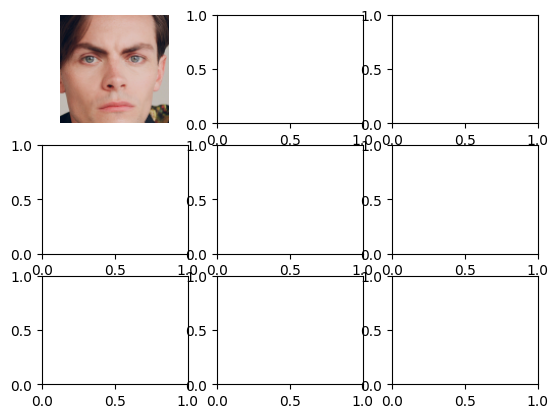

In [60]:

freddyurl = "https://visualtalesmagazine.com/wp-content/uploads/2021/10/Freddy2.jpg"
# image =  imutils.url_to_image(freddyurl)
# image = imutils.resize(image,width=250)
# fig, ax = plt.subplots()
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# ax.axis('off')  


# ax.set_title('Color') 
# plt.show()



freddyinput1 = facialrecognition(freddyurl)

## now I'm gonna try my saturation function



In [61]:
# def saturationtry2(numpyarray): #not as good. I THINK BRIGHT SHOULD BE CONTRAST NOT SATURATION... 

#     # Get Image from URL. If you want to upload an image file and use that comment the below code and replace with  image=cv2.imread("FILE_NAME")
    # # img =  imutils.url_to_image(fileurl)

    # # Resize image to a width of 250
    # numpyarray= imutils.resize(numpyarray,width=250)

    # #Show image
    # plt.imshow(cv2.cvtColor(numpyarray,cv2.COLOR_BGR2RGB))
    # plt.show()

    # img_hsv = cv2.cvtColor(numpyarray, cv2.COLOR_BGR2HSV)
    # saturation = img_hsv[:, :, 1].mean() #mean of the second channel

    # if saturation > 50:
    #     return "clear", saturation
    # elif saturation <= 50:
    #     return "muted", saturation

In [62]:
# saturationtry2(LoFi[1])

NameError: name 'saturationtry2' is not defined

# Now I'm gonna try a different way to calculate the saturation

In [63]:
def saturationtry3(numpyarray): # LET's USE THIS ONE. 
    # saturation that will just use contrast of an image. 
    # takes in a numpy array
    # the contrast will be between 0 and 1
    # https://stackoverflow.com/questions/58821130/how-to-calculate-the-contrast-of-an-image

    
    # load image as YUV (or YCbCR) and select Y (intensity)
    # or convert to grayscale, which should be the same.
    # Alternately, use L (luminance) from LAB.
    plt.imshow(cv2.cvtColor(numpyarray,cv2.COLOR_BGR2RGB))
    Y = cv2.cvtColor(numpyarray, cv2.COLOR_BGR2YUV)[:,:,0]


    # compute min and max of Y
    min = np.min(Y)
    max = np.max(Y)

    # compute contrast
    contrast = (max-min)/(max+min)
    
    print(f"the min {min},max {max},the contrast*100 is {contrast*100}")
    if contrast*100 > 50:
        return "clear", contrast*100
    else:
        return "muted", contrast*100

the min 10,max 203,the contrast*100 is 90.61032863849765


('clear', 90.61032863849765)

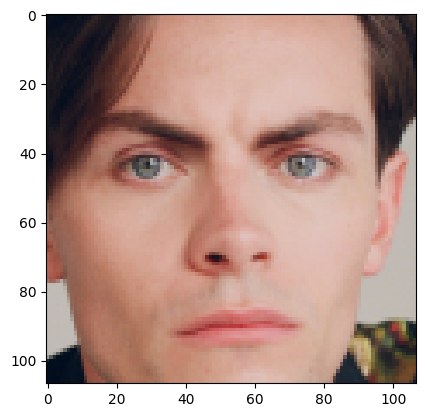

In [65]:
saturationtry3(freddyinput1)

In [66]:
# def clearorsoft(numpyarray):
#     ## averages contrast and saturation levels together!
#     attribute, level1 = saturationtry2(numpyarray) 
#     attribute, level2 = saturationtry3(numpyarray)
#     average = (level1 +level2)/2
#     if average > 50:
#         return "clear", average
#     else:
#         return "soft", average

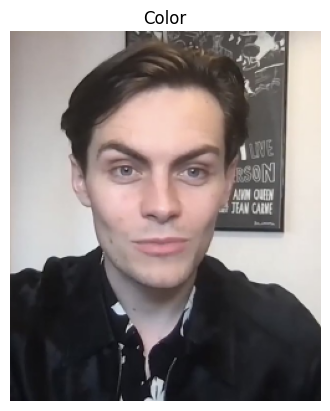

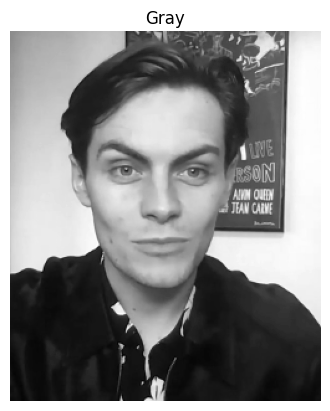

Found 1 faces!
face 0: [ 55  60 132 132]
the face that is probably a face is 0 with a size of 17424
Drawn! How does it do?


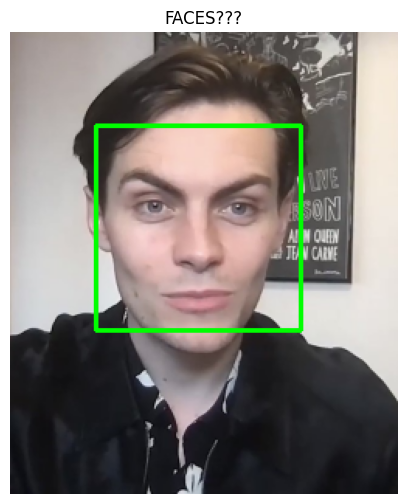

There are 1 faces detected - they are held in the list 'LoFi'
Here are some of them...


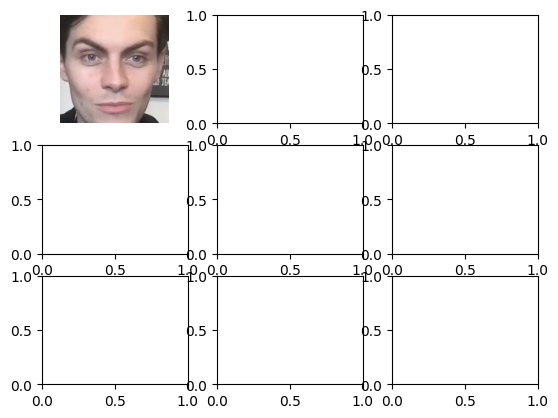

In [68]:
#Try it on light freddy
lightfreddy = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/Freddy_carter_2021_1.jpg/640px-Freddy_carter_2021_1.jpg"
freddyinput = facialrecognition(lightfreddy) #use facial detection first

# clearorsoft(freddyinput[0])



the min 18,max 234,the contrast*100 is 85.71428571428571


('clear', 85.71428571428571)

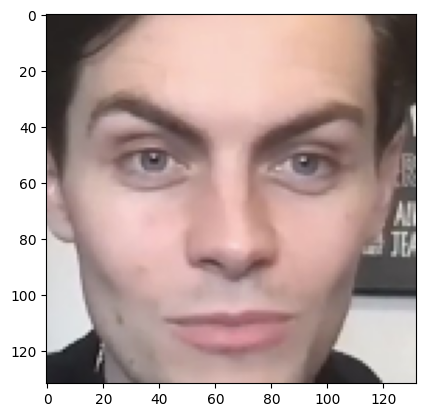

In [70]:
saturationtry3(freddyinput)

## Now I'll try to make a function that will calculate the value

In [72]:
freddy = "https://visualtalesmagazine.com/wp-content/uploads/2021/10/Freddy2.jpg"

## maybe it will take in a numpy array then extract ... dominant colors. Get rgb, and find the values. 


In [73]:
import colorsys
def getRGB(fileurl):
    """ reads a numpy array and returns the value. 
    """
    img =  imutils.url_to_image(fileurl)
    num_rows = len(img) 
    num_cols = len(img[0]) 
    for row in range(num_rows):             # loop over each row
        for col in range(num_cols):         # loop over each column
            r, g, b = image_rgb[row][col]   # the "old" pixel's rgb
            h,s,v = colorsys.rgb_to_hsv(r, g, b)
            return (h,s,v)


In [74]:
getRGB(freddy)

(0.5166666666666666, 0.050505050505050504, 198)

In [75]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [76]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [77]:
pip install sklearn.cluster

ERROR: Could not find a version that satisfies the requirement sklearn.cluster (from versions: none)
ERROR: No matching distribution found for sklearn.cluster
Note: you may need to restart the kernel to use updated packages.


In [78]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from collections import Counter
import imutils
import pprint
from matplotlib import pyplot as plt

In [79]:
pip install KMeans

Note: you may need to restart the kernel to use updated packages.


In [89]:
def extractSkin(image):
  # Taking a copy of the image
  img =  image.copy()
  # Converting from BGR Colours Space to HSV
  img =  cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  
  # Defining HSV Threadholds
  lower_threshold = np.array([0, 48, 80], dtype=np.uint8)
  upper_threshold = np.array([20, 255, 255], dtype=np.uint8)
  
  # Single Channel mask,denoting presence of colours in the about threshold
  skinMask = cv2.inRange(img,lower_threshold,upper_threshold)
  
  # Cleaning up mask using Gaussian Filter
  skinMask = cv2.GaussianBlur(skinMask,(3,3),0)
  
  # Extracting skin from the threshold mask
  skin  =  cv2.bitwise_and(img,img,mask=skinMask)
  
  # Return the Skin image
  return cv2.cvtColor(skin,cv2.COLOR_HSV2BGR)



In [90]:
def removeBlack(estimator_labels, estimator_cluster):
  
  
  # Check for black
  hasBlack = False
  
  # Get the total number of occurance for each color
  occurance_counter = Counter(estimator_labels)

  
  # Quick lambda function to compare to lists
  compare = lambda x, y: Counter(x) == Counter(y)
   
  # Loop through the most common occuring color
  for x in occurance_counter.most_common(len(estimator_cluster)):
    
    # Quick List comprehension to convert each of RBG Numbers to int
    color = [int(i) for i in estimator_cluster[x[0]].tolist() ]
    
  
    
    # Check if the color is [0,0,0] that if it is black 
    if compare(color , [0,0,0]) == True:
      # delete the occurance
      del occurance_counter[x[0]]
      # remove the cluster 
      hasBlack = True
      estimator_cluster = np.delete(estimator_cluster,x[0],0)
      break
      
   
  return (occurance_counter,estimator_cluster,hasBlack)
    
    

In [91]:
def getColorInformation(estimator_labels, estimator_cluster,hasThresholding=False):
  
  # Variable to keep count of the occurance of each color predicted
  occurance_counter = None
  
  # Output list variable to return
  colorInformation = []
  
  
  #Check for Black
  hasBlack =False
  
  # If a mask has be applied, remove th black
  if hasThresholding == True:
    
    (occurance,cluster,black) = removeBlack(estimator_labels,estimator_cluster)
    occurance_counter =  occurance
    estimator_cluster = cluster
    hasBlack = black
    
  else:
    occurance_counter = Counter(estimator_labels)
 
  # Get the total sum of all the predicted occurances
  totalOccurance = sum(occurance_counter.values()) 
  
 
  # Loop through all the predicted colors
  for x in occurance_counter.most_common(len(estimator_cluster)):
    
    index = (int(x[0]))
    
    # Quick fix for index out of bound when there is no threshold
    index =  (index-1) if ((hasThresholding & hasBlack)& (int(index) !=0)) else index
    
    # Get the color number into a list
    color = estimator_cluster[index].tolist()
    
    # Get the percentage of each color
    color_percentage= (x[1]/totalOccurance)
    
    #make the dictionay of the information
    colorInfo = {"cluster_index":index , "color": color , "color_percentage" : color_percentage }
    
    # Add the dictionary to the list
    colorInformation.append(colorInfo)
    
      
  return colorInformation 

In [92]:

def extractDominantColor(image,number_of_colors=5,hasThresholding=False):
  
  # Quick Fix Increase cluster counter to neglect the black(Read Article) 
  if hasThresholding == True:
    number_of_colors +=1
  
  # Taking Copy of the image
  img = image.copy()
  
  # Convert Image into RGB Colours Space
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  
  # Reshape Image
  img = img.reshape((img.shape[0]*img.shape[1]) , 3)
  
  #Initiate KMeans Object
  estimator = KMeans(n_clusters=number_of_colors, random_state=0)
  
  # Fit the image
  estimator.fit(img)
  
  # Get Colour Information
  colorInformation = getColorInformation(estimator.labels_,estimator.cluster_centers_,hasThresholding)
  return colorInformation
  
  

In [93]:
def plotColorBar(colorInformation):
  #Create a 500x100 black image
  color_bar = np.zeros((100,500,3), dtype="uint8")
  
  top_x = 0
  for x in colorInformation:    
    bottom_x = top_x + (x["color_percentage"] * color_bar.shape[1])

    color = tuple(map(int,(x['color'])))
  
    cv2.rectangle(color_bar , (int(top_x),0) , (int(bottom_x),color_bar.shape[0]) ,color , -1)
    top_x = bottom_x
  return color_bar

In [94]:
def prety_print_data(color_info):
  for x in color_info:
    print(pprint.pformat(x))
    print()

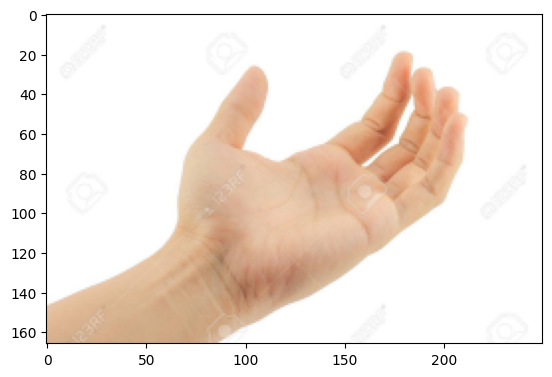

<class 'numpy.ndarray'>


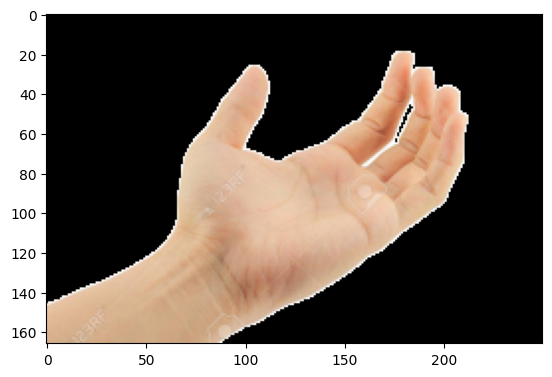

Color Information
{'cluster_index': 4,
 'color': [223.17459643160703, 182.13084112149522, 149.45475785896227],
 'color_percentage': 0.3173764792404894}

{'cluster_index': 2,
 'color': [231.21322976697758, 196.96166374342368, 168.30919569030226],
 'color_percentage': 0.2679013171090459}

{'cluster_index': 0,
 'color': [211.7645017352512, 165.45537927615248, 130.93207734258715],
 'color_percentage': 0.2673664504914087}

{'cluster_index': 3,
 'color': [195.47740667976444, 135.26784544859157, 101.25278323510138],
 'color_percentage': 0.10075549909741258}

{'cluster_index': 1,
 'color': [248.32137733142054, 243.87087517934032, 238.32711621233858],
 'color_percentage': 0.04660025406164338}

Color Bar


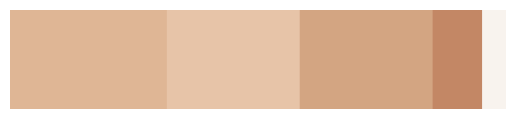

In [95]:


'''
Skin Image Primary : https://raw.githubusercontent.com/octalpixel/Skin-Extraction-from-Image-and-Finding-Dominant-Color/master/82764696-open-palm-hand-gesture-of-male-hand_image_from_123rf.com.jpg
Skin Image One     : https://raw.githubusercontent.com/octalpixel/Skin-Extraction-from-Image-and-Finding-Dominant-Color/master/skin.jpg
Skin Image Two     : https://raw.githubusercontent.com/octalpixel/Skin-Extraction-from-Image-and-Finding-Dominant-Color/master/skin_2.jpg
Skin Image Three   : https://raw.githubusercontent.com/octalpixel/Skin-Extraction-from-Image-and-Finding-Dominant-Color/master/Human-Hands-Front-Back-Image-From-Wikipedia.jpg

'''

# just ChANge this TO OTHER THING TO GET IMAGE. 
# Get Image from URL. If you want to upload an image file and use that comment the below code and replace with  image=cv2.imread("FILE_NAME")
image =  imutils.url_to_image("https://raw.githubusercontent.com/octalpixel/Skin-Extraction-from-Image-and-Finding-Dominant-Color/master/82764696-open-palm-hand-gesture-of-male-hand_image_from_123rf.com.jpg")

#THIS STAYS THE SAME FOR FILE OR URL. 
# Resize image to a width of 250
image = imutils.resize(image,width=250)

#Show image
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()


# Apply Skin Mask
skin = extractSkin(image)
print(type(skin))

plt.imshow(cv2.cvtColor(skin,cv2.COLOR_BGR2RGB))
plt.show()



# Find the dominant color. Default is 1 , pass the parameter 'number_of_colors=N' where N is the specified number of colors 
dominantColors = extractDominantColor(skin,hasThresholding=True)




#Show in the dominant color information
print("Color Information")
prety_print_data(dominantColors)


#Show in the dominant color as bar
print("Color Bar")
colour_bar = plotColorBar(dominantColors)
plt.axis("off")
plt.imshow(colour_bar)
plt.show()




In [96]:
url = "http://"

url[0:5]

'http:'

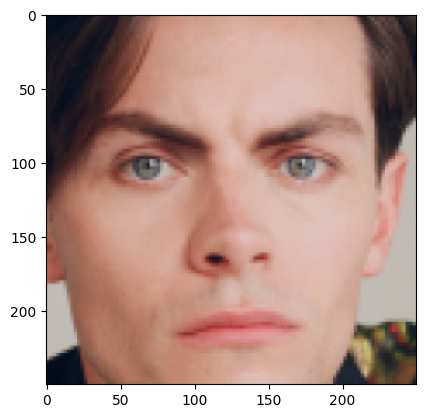

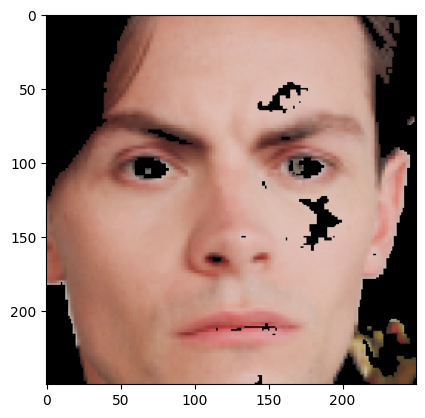

Color Information
{'cluster_index': 4,
 'color': [219.51397485178268, 181.74936477946687, 169.64453710339473],
 'color_percentage': 0.3058797969623353}

{'cluster_index': 0,
 'color': [209.7925637445796, 162.33161878168946, 146.91226394297925],
 'color_percentage': 0.2674843475341194}

{'cluster_index': 2,
 'color': [191.55403158769653, 132.52452202826314, 114.31369492934343],
 'color_percentage': 0.18838261144358198}

{'cluster_index': 1,
 'color': [158.35837470603602, 100.55330546119708, 83.95218186569096],
 'color_percentage': 0.15133021271553002}

{'cluster_index': 3,
 'color': [96.28639672429387, 59.5075068243864, 51.61624203821629],
 'color_percentage': 0.08692303134443326}

Color Bar


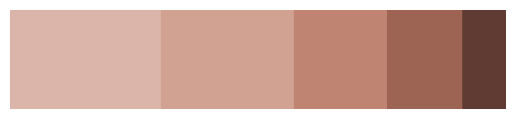

[{'cluster_index': 4,
  'color': [219.51397485178268, 181.74936477946687, 169.64453710339473],
  'color_percentage': 0.3058797969623353},
 {'cluster_index': 0,
  'color': [209.7925637445796, 162.33161878168946, 146.91226394297925],
  'color_percentage': 0.2674843475341194},
 {'cluster_index': 2,
  'color': [191.55403158769653, 132.52452202826314, 114.31369492934343],
  'color_percentage': 0.18838261144358198},
 {'cluster_index': 1,
  'color': [158.35837470603602, 100.55330546119708, 83.95218186569096],
  'color_percentage': 0.15133021271553002},
 {'cluster_index': 3,
  'color': [96.28639672429387, 59.5075068243864, 51.61624203821629],
  'color_percentage': 0.08692303134443326}]

In [99]:

def skinextractor(imageinput):

    if isinstance(imageinput, np.ndarray): #testing if numpy image
        image = imutils.resize(imageinput,width=250)
    elif isinstance(imageinput, str): # if it's a string
        if imageinput[0:5] == 'http:': #if url    
            image =  imutils.url_to_image(imageinput)
        else: #it's a file
            image=cv2.imread(imageinput)

    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.show()

    
    # Apply Skin Mask
    skin = extractSkin(image)

    plt.imshow(cv2.cvtColor(skin,cv2.COLOR_BGR2RGB))
    plt.show()



    # Find the dominant color. Default is 1 , pass the parameter 'number_of_colors=N' where N is the specified number of colors 
    dominantColors = extractDominantColor(skin,hasThresholding=True)




    #Show in the dominant color information
    print("Color Information")
    prety_print_data(dominantColors)


    #Show in the dominant color as bar
    print("Color Bar")
    colour_bar = plotColorBar(dominantColors)
    plt.axis("off")
    plt.imshow(colour_bar)
    plt.show()
    return dominantColors
    
skinextractor(freddyinput1)

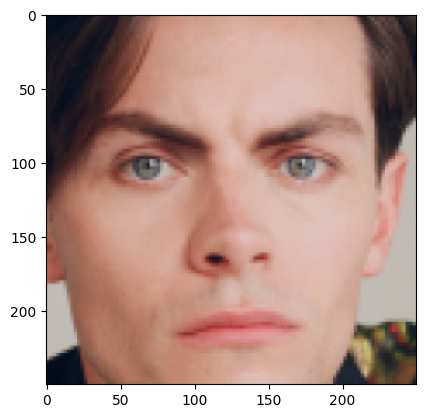

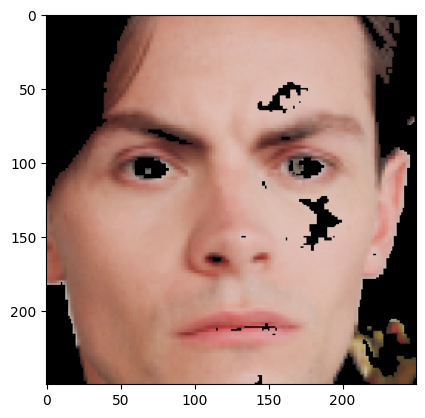

Color Information
{'cluster_index': 4,
 'color': [219.51397485178268, 181.74936477946687, 169.64453710339473],
 'color_percentage': 0.3058797969623353}

{'cluster_index': 0,
 'color': [209.7925637445796, 162.33161878168946, 146.91226394297925],
 'color_percentage': 0.2674843475341194}

{'cluster_index': 2,
 'color': [191.55403158769653, 132.52452202826314, 114.31369492934343],
 'color_percentage': 0.18838261144358198}

{'cluster_index': 1,
 'color': [158.35837470603602, 100.55330546119708, 83.95218186569095],
 'color_percentage': 0.15133021271553002}

{'cluster_index': 3,
 'color': [96.28639672429387, 59.50750682438639, 51.616242038216285],
 'color_percentage': 0.08692303134443326}

Color Bar


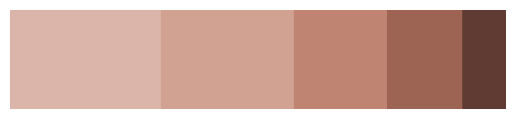

[{'cluster_index': 4,
  'color': [219.51397485178268, 181.74936477946687, 169.64453710339473],
  'color_percentage': 0.3058797969623353},
 {'cluster_index': 0,
  'color': [209.7925637445796, 162.33161878168946, 146.91226394297925],
  'color_percentage': 0.2674843475341194},
 {'cluster_index': 2,
  'color': [191.55403158769653, 132.52452202826314, 114.31369492934343],
  'color_percentage': 0.18838261144358198},
 {'cluster_index': 1,
  'color': [158.35837470603602, 100.55330546119708, 83.95218186569095],
  'color_percentage': 0.15133021271553002},
 {'cluster_index': 3,
  'color': [96.28639672429387, 59.50750682438639, 51.616242038216285],
  'color_percentage': 0.08692303134443326}]

In [100]:
skinextractor(freddyinput1)

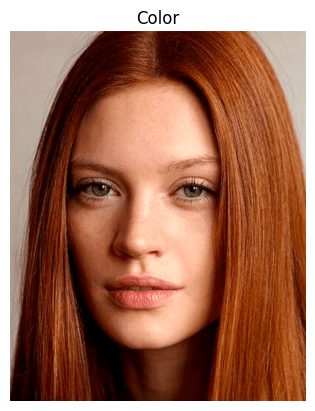

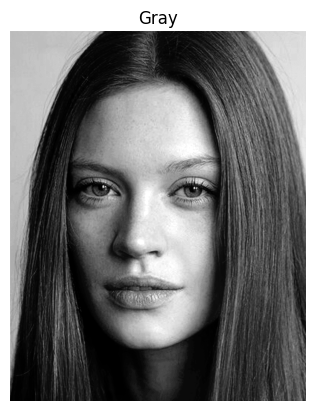

Found 2 faces!
face 0: [242  12  66  66]
face 1: [ 60 157 420 420]
the face that is probably a face is 1 with a size of 176400
Drawn! How does it do?


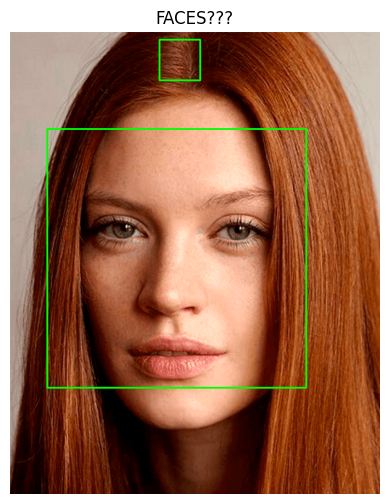

There are 2 faces detected - they are held in the list 'LoFi'
Here are some of them...


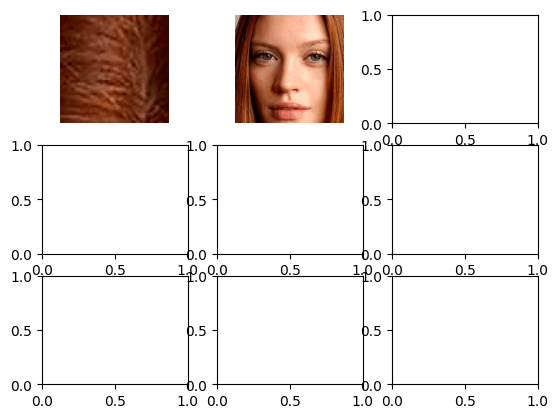

In [137]:
muted = facialrecognition("trueautumnwarm.png")

the min 0,max 232,the contrast*100 is 100.0


('clear', 100.0)

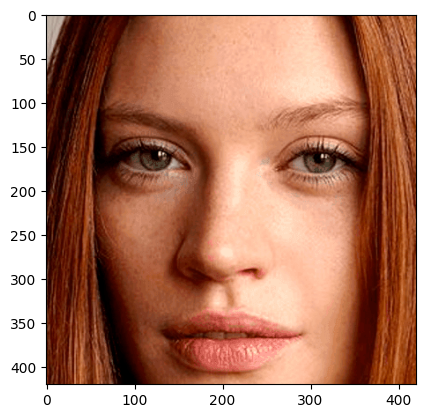

In [138]:
saturationtry3(muted)

# might have to change that ... 

## okay so that  didn't work :(

In [ ]:
angelina = "https://m.media-amazon.com/images/M/MV5BODg3MzYwMjE4N15BMl5BanBnXkFtZTcwMjU5NzAzNw@@._V1_UY264_CR18,0,178,264_AL_.jpg"

In [ ]:
pwd

'/Users/waverlywang/Documents/programmingpracticum/wcdataset'

# Test the file stuff 

In [103]:
pwd

'/Users/waverlywang/Documents/programmingpracticum/wcdataset'

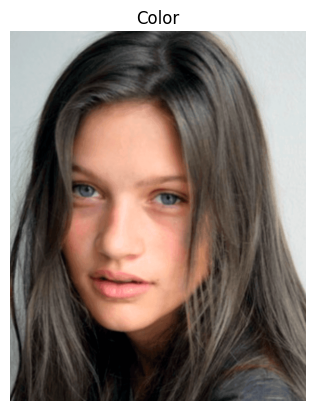

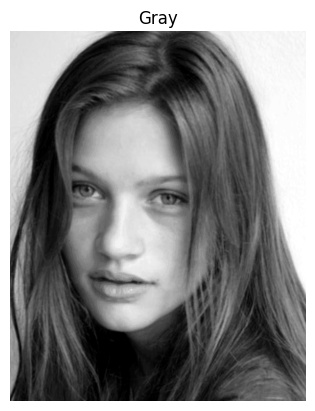

Found 3 faces!
face 0: [294  56  38  38]
face 1: [ 44 205 361 361]
face 2: [130 168 449 449]
the face that is probably a face is 2 with a size of 201601
Drawn! How does it do?


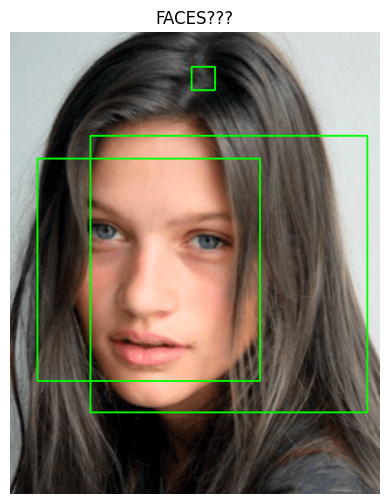

There are 3 faces detected - they are held in the list 'LoFi'
Here are some of them...


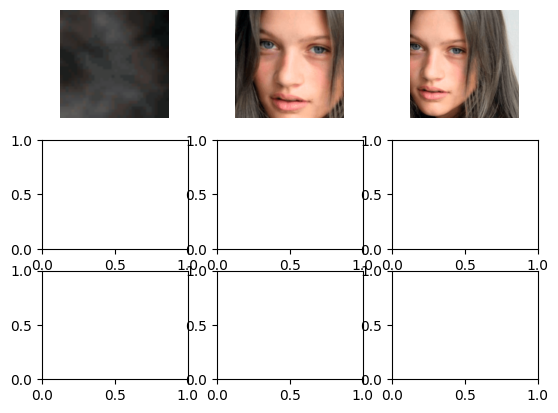

In [109]:
coolsummer = facialrecognition("truesummercool.png")


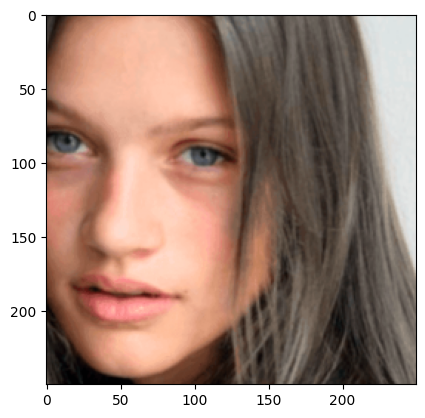

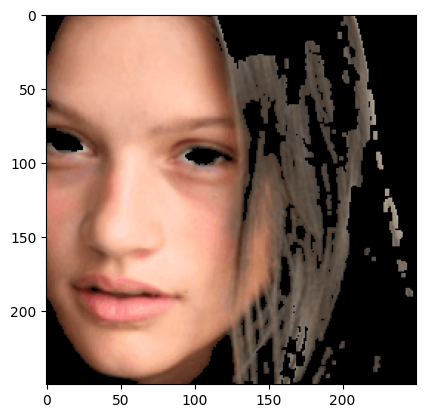

Color Information
{'cluster_index': 2,
 'color': [88.25694384727811, 68.4712357038434, 57.287213001977946],
 'color_percentage': 0.27124525489648105}

{'cluster_index': 0,
 'color': [250.9143593660521, 194.3462860416301, 169.4406148558319],
 'color_percentage': 0.24388085423507766}

{'cluster_index': 1,
 'color': [132.88143804181536, 93.67644059153498, 75.87302396736362],
 'color_percentage': 0.1825147301986539}

{'cluster_index': 3,
 'color': [224.91532690246595, 156.69177767570028, 132.39718266727988],
 'color_percentage': 0.151959756864389}

{'cluster_index': 4,
 'color': [184.83733168240218, 124.10834236186301, 101.16251354279555],
 'color_percentage': 0.15039940380539835}

Color Bar


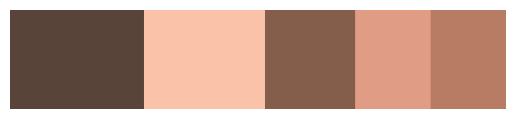

[{'cluster_index': 2,
  'color': [88.25694384727811, 68.4712357038434, 57.287213001977946],
  'color_percentage': 0.27124525489648105},
 {'cluster_index': 0,
  'color': [250.9143593660521, 194.3462860416301, 169.4406148558319],
  'color_percentage': 0.24388085423507766},
 {'cluster_index': 1,
  'color': [132.88143804181536, 93.67644059153498, 75.87302396736362],
  'color_percentage': 0.1825147301986539},
 {'cluster_index': 3,
  'color': [224.91532690246595, 156.69177767570028, 132.39718266727988],
  'color_percentage': 0.151959756864389},
 {'cluster_index': 4,
  'color': [184.83733168240218, 124.10834236186301, 101.16251354279555],
  'color_percentage': 0.15039940380539835}]

In [110]:
skinextractor(coolsummer)

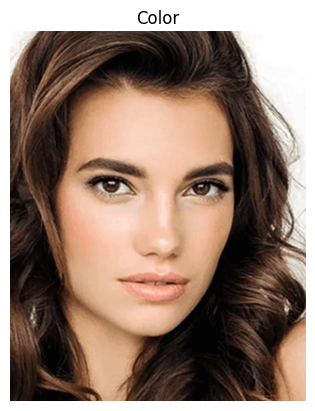

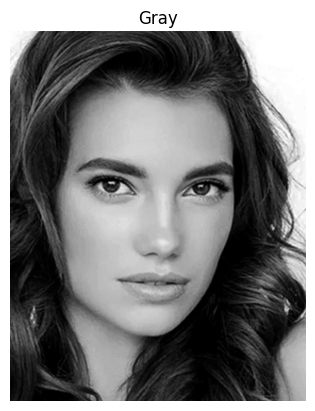

Found 3 faces!
face 0: [90 26 42 42]
face 1: [ 89 156 420 420]
face 2: [501 638  46  46]
the face that is probably a face is 1 with a size of 176400
Drawn! How does it do?


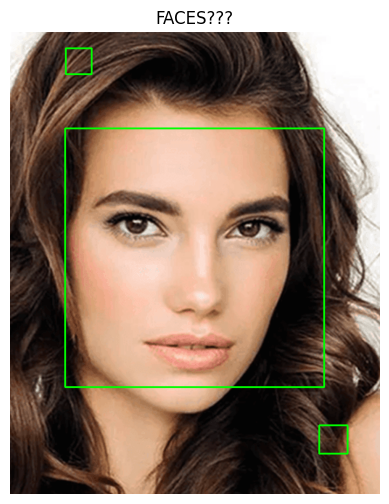

There are 3 faces detected - they are held in the list 'LoFi'
Here are some of them...


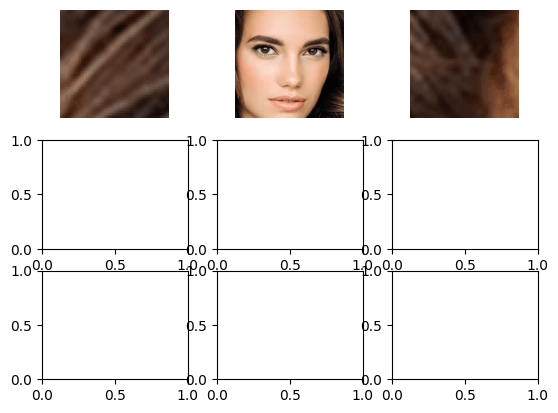

In [105]:
darkautumn = facialrecognition("darkautumnwarm.png")

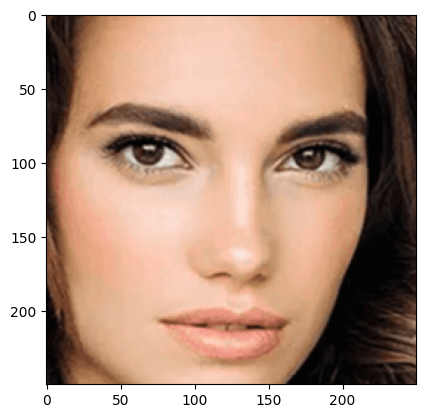

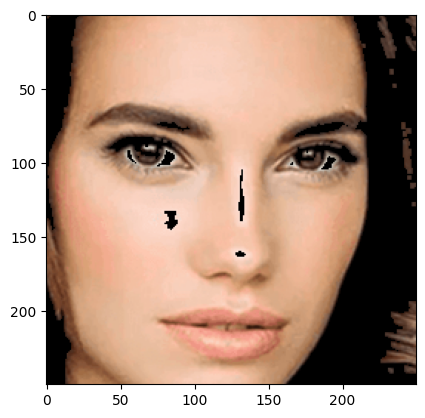

Color Information
{'cluster_index': 0,
 'color': [245.48279500557294, 200.6162729351084, 177.07468198604636],
 'color_percentage': 0.3447815803836746}

{'cluster_index': 3,
 'color': [229.0668084230771, 175.9527402428139, 143.7145894780159],
 'color_percentage': 0.29464917423032605}

{'cluster_index': 2,
 'color': [198.9407315421085, 146.63772860690904, 110.82095281101823],
 'color_percentage': 0.17938506943742547}

{'cluster_index': 1,
 'color': [90.18851063829861, 58.67170212765927, 43.1402127659575],
 'color_percentage': 0.09484727809335139}

{'cluster_index': 4,
 'color': [150.37438538983838, 104.4329196909389, 76.09997658627947],
 'color_percentage': 0.08633689785522246}

Color Bar


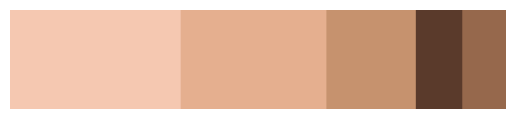

[{'cluster_index': 0,
  'color': [245.48279500557294, 200.6162729351084, 177.07468198604636],
  'color_percentage': 0.3447815803836746},
 {'cluster_index': 3,
  'color': [229.0668084230771, 175.9527402428139, 143.7145894780159],
  'color_percentage': 0.29464917423032605},
 {'cluster_index': 2,
  'color': [198.9407315421085, 146.63772860690904, 110.82095281101823],
  'color_percentage': 0.17938506943742547},
 {'cluster_index': 1,
  'color': [90.18851063829861, 58.67170212765927, 43.1402127659575],
  'color_percentage': 0.09484727809335139},
 {'cluster_index': 4,
  'color': [150.37438538983838, 104.4329196909389, 76.09997658627947],
  'color_percentage': 0.08633689785522246}]

In [107]:
skinextractor(darkautumn)

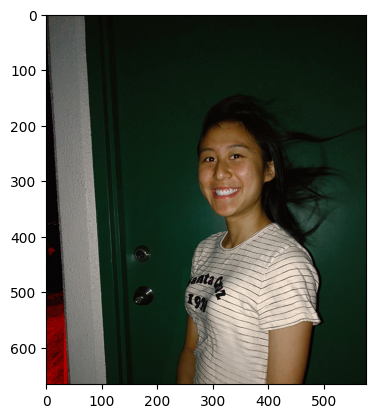

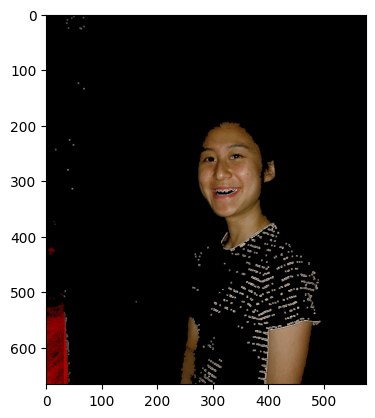

Color Information
{'cluster_index': 4,
 'color': [131.75967968298352, 93.03863617600426, 56.50532485759102],
 'color_percentage': 0.30225481392796566}

{'cluster_index': 0,
 'color': [158.55666364460112, 124.84369900271287, 95.9417951042576],
 'color_percentage': 0.27499251721041607}

{'cluster_index': 1,
 'color': [90.6015116523223, 58.62576107495305, 25.30936384631594],
 'color_percentage': 0.23770328245036415}

{'cluster_index': 3,
 'color': [120.87497462959175, 1.6121372031664505, 1.3541708950677798],
 'color_percentage': 0.1228923476005188}

{'cluster_index': 2,
 'color': [211.0380608974379, 198.68870192307435, 186.54246794871662],
 'color_percentage': 0.06215703881073531}

Color Bar


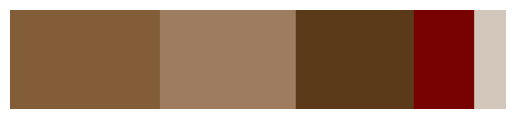

[{'cluster_index': 4,
  'color': [131.75967968298352, 93.03863617600426, 56.50532485759102],
  'color_percentage': 0.30225481392796566},
 {'cluster_index': 0,
  'color': [158.55666364460112, 124.84369900271287, 95.9417951042576],
  'color_percentage': 0.27499251721041607},
 {'cluster_index': 1,
  'color': [90.6015116523223, 58.62576107495305, 25.30936384631594],
  'color_percentage': 0.23770328245036415},
 {'cluster_index': 3,
  'color': [120.87497462959175, 1.6121372031664505, 1.3541708950677798],
  'color_percentage': 0.1228923476005188},
 {'cluster_index': 2,
  'color': [211.0380608974379, 198.68870192307435, 186.54246794871662],
  'color_percentage': 0.06215703881073531}]

In [ ]:
skinextractor("4BetterImages-After.jpg")

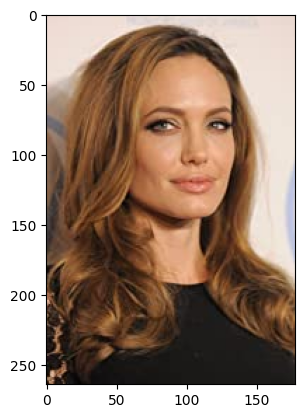

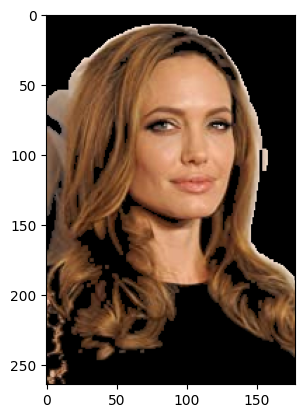

Color Information
{'cluster_index': 3,
 'color': [114.39685039370049, 73.35918635170579, 45.2640419947507],
 'color_percentage': 0.2663758530922395}

{'cluster_index': 2,
 'color': [78.49912203687451, 46.91191103306992, 26.95654082528501],
 'color_percentage': 0.2406951382537114}

{'cluster_index': 0,
 'color': [149.69401288366817, 100.6392572944296, 65.21447517999215],
 'color_percentage': 0.18651938366284387}

{'cluster_index': 1,
 'color': [224.43936077057634, 173.47548161120883, 140.4660683012273],
 'color_percentage': 0.16161260817561388}

{'cluster_index': 4,
 'color': [193.65899175957247, 138.23267086766847, 99.83688802714553],
 'color_percentage': 0.14479701681559137}

Color Bar


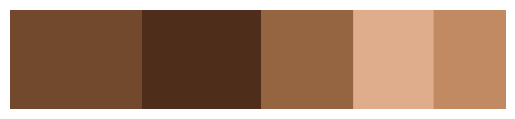

[{'cluster_index': 3,
  'color': [114.39685039370049, 73.35918635170579, 45.2640419947507],
  'color_percentage': 0.2663758530922395},
 {'cluster_index': 2,
  'color': [78.49912203687451, 46.91191103306992, 26.95654082528501],
  'color_percentage': 0.2406951382537114},
 {'cluster_index': 0,
  'color': [149.69401288366817, 100.6392572944296, 65.21447517999215],
  'color_percentage': 0.18651938366284387},
 {'cluster_index': 1,
  'color': [224.43936077057634, 173.47548161120883, 140.4660683012273],
  'color_percentage': 0.16161260817561388},
 {'cluster_index': 4,
  'color': [193.65899175957247, 138.23267086766847, 99.83688802714553],
  'color_percentage': 0.14479701681559137}]

In [ ]:
skinextractor(angelina)

In [ ]:
numpyangelina =  imutils.url_to_image(angelina)

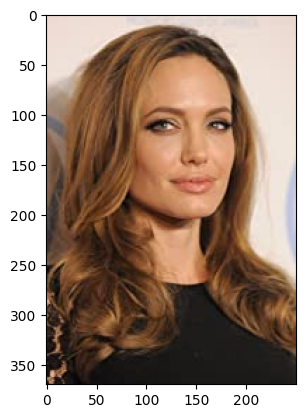

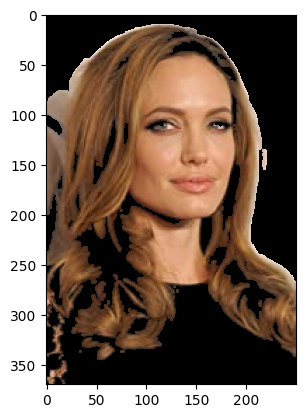

Color Information
{'cluster_index': 2,
 'color': [114.83674926801427, 73.65107476969307, 45.38584589016643],
 'color_percentage': 0.25907663896583566}

{'cluster_index': 3,
 'color': [82.08079532902009, 49.538740729051995, 28.87359949502912],
 'color_percentage': 0.23418282548476455}

{'cluster_index': 0,
 'color': [148.01465877099173, 99.11319289389428, 63.64459761188183],
 'color_percentage': 0.18930747922437674}

{'cluster_index': 1,
 'color': [223.03849024415882, 170.79646017699295, 136.7894231794442],
 'color_percentage': 0.1739612188365651}

{'cluster_index': 4,
 'color': [190.7722314897958, 135.5587065315023, 97.2149364814557],
 'color_percentage': 0.143471837488458}

Color Bar


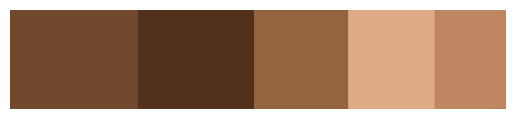

[{'cluster_index': 2,
  'color': [114.83674926801427, 73.65107476969307, 45.38584589016643],
  'color_percentage': 0.25907663896583566},
 {'cluster_index': 3,
  'color': [82.08079532902009, 49.538740729051995, 28.87359949502912],
  'color_percentage': 0.23418282548476455},
 {'cluster_index': 0,
  'color': [148.01465877099173, 99.11319289389428, 63.64459761188183],
  'color_percentage': 0.18930747922437674},
 {'cluster_index': 1,
  'color': [223.03849024415882, 170.79646017699295, 136.7894231794442],
  'color_percentage': 0.1739612188365651},
 {'cluster_index': 4,
  'color': [190.7722314897958, 135.5587065315023, 97.2149364814557],
  'color_percentage': 0.143471837488458}]

In [ ]:
skinextractor(numpyangelina)

# calculate the value

In [111]:
def darkorlight1(numpyarray):
    # something that takes in the face and averages the value channel 
    
    # img =  imutils.url_to_image(fileurl)

    # Resize image to a width of 250
    numpyarray= imutils.resize(numpyarray,width=250)

    #Show image
    plt.imshow(cv2.cvtColor(numpyarray,cv2.COLOR_BGR2RGB))
    plt.show()

    img_hsv = cv2.cvtColor(numpyarray, cv2.COLOR_BGR2HSV)
    value = img_hsv[:, :, 2].mean() #mean of the second channel which is value

    if value > 50:
        return "dark", value
    elif value <= 50:
        return "light", value
    # dominant_colors = extractDominantColor(numpyarray,number_of_colors=5,hasThresholding=False)

# Try this out... 

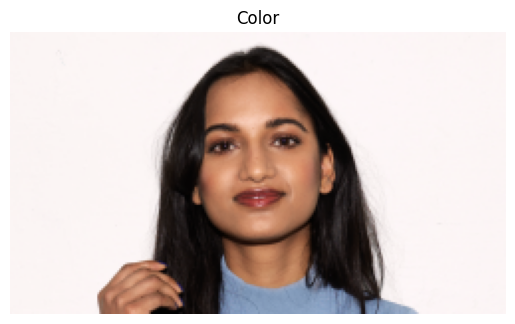

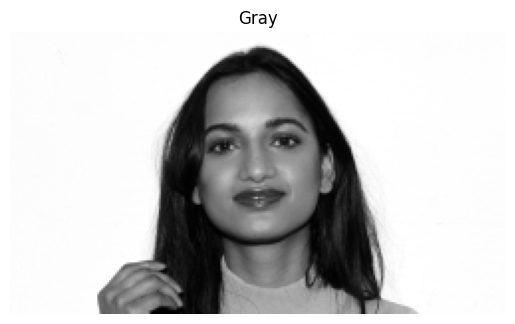

Found 1 faces!
face 0: [85 26 79 79]
the face that is probably a face is 0 with a size of 6241
Drawn! How does it do?


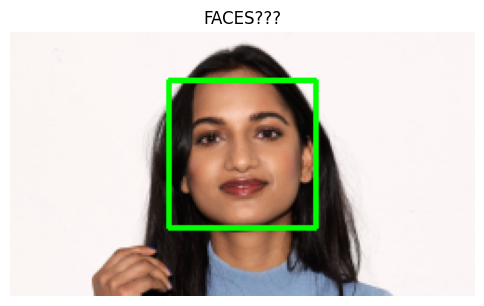

There are 1 faces detected - they are held in the list 'LoFi'
Here are some of them...


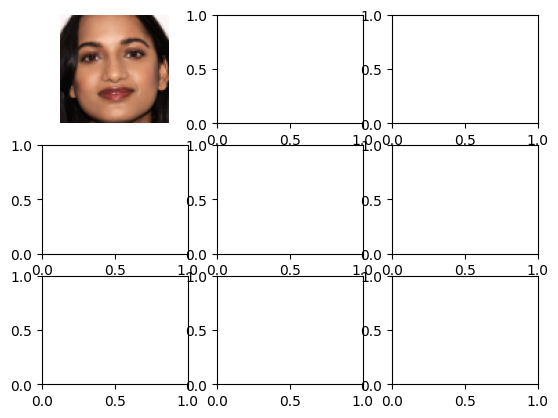

In [113]:
amita = facialrecognition("https://d26oc3sg82pgk3.cloudfront.net/files/media/edit/image/43291/article_full%401x.png")

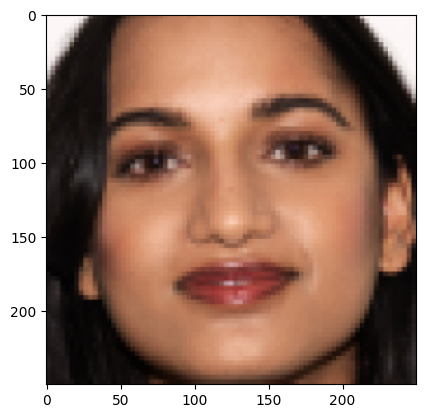

('dark', 134.454704)

In [114]:
darkorlight1(amita)



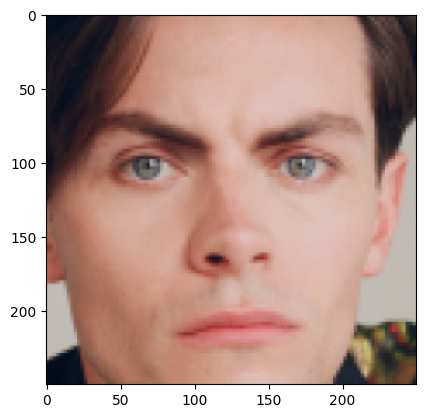

('dark', 173.439136)

In [115]:
darkorlight1(freddyinput1)

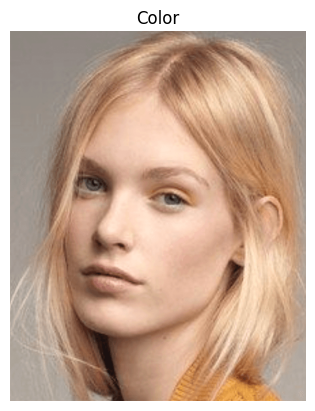

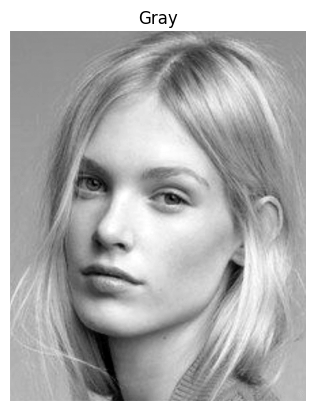

Found 2 faces!
face 0: [ 34 164 411 411]
face 1: [467 316  88  88]
the face that is probably a face is 0 with a size of 168921
Drawn! How does it do?


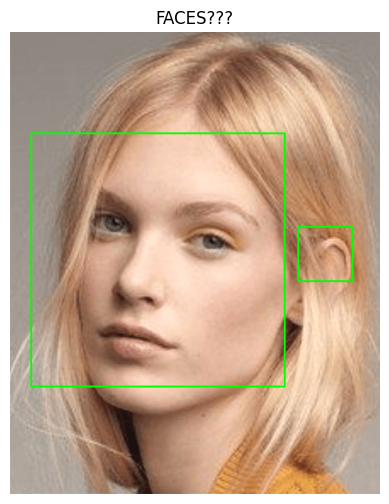

There are 2 faces detected - they are held in the list 'LoFi'
Here are some of them...


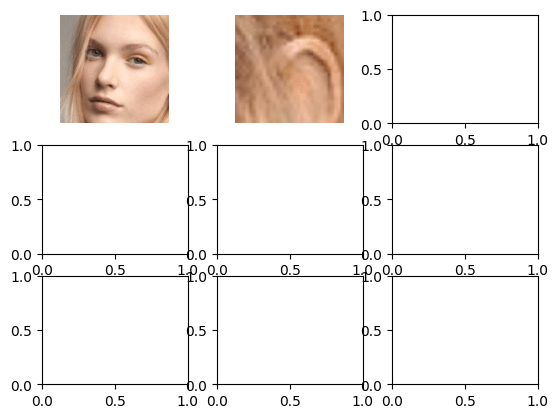

In [118]:
spring = facialrecognition("lightspringwarm.png")

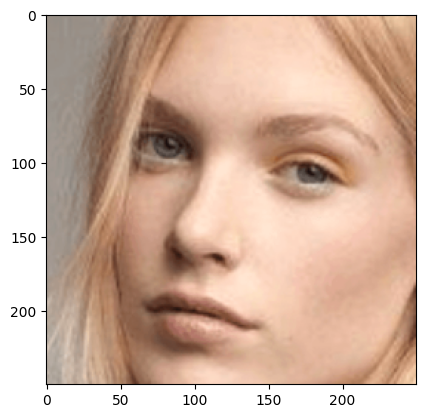

('dark', 200.13256)

In [121]:
darkorlight1(spring)

## lol this is def not working...I'll try again

In [143]:
def darkorlight2(numpyarray):
    # something that takes in the face and averages the value channel 
    
    # img =  imutils.url_to_image(fileurl)

    # Resize image to a width of 250
    numpyarray= imutils.resize(numpyarray,width=250)
    color_info = extractDominantColor(numpyarray,number_of_colors=5,hasThresholding=False)
    sum = 0
    for info in color_info:
        r,g,b = info["color"]
        
        h,s,v = colorsys.rgb_to_hsv(r,g,b)
        sum += v
    avgvalue = sum/len(color_info)
    if avgvalue > 255/2: #max of value is 255
        return "dark", (avgvalue/255)*100
    elif avgvalue <= 255/2:
        return "light", (avgvalue/255)*100




In [145]:
darkorlight2(amita)

('dark', 59.961651976163324)

## get the seasons



In [ ]:
from typing import Tuple
import numpy as np

COLOR_SEASON_DICT = {
    # spring
    ("bright", "warm"): "bright spring",
    ("warm", "bright"): "true spring",
    ("light", "warm"): "light spring",
    # summer
    ("light", "cool"): "light summer",
    ("cool", "muted"): "true summer",
    ("muted", "cool"): "soft summer",
    # autumn
    ("muted", "warm"): "soft autumn",
    ("warm", "muted"): "true autumn",
    ("dark", "warm"): "dark autumn",
    # winter
    ("dark", "cool"): "dark winter",
    ("cool", "bright"): "true winter",
    ("bright", "cool"): "bright winter"
}

def match_characteristics_to_season(primary_characteristic: str,
                                    secondary_characteristic: str) -> str:
    return COLOR_SEASON_DICT[
        (primary_characteristic, secondary_characteristic)]


def get_primary_and_secondary_characteristics(
        imageinput
) -> Tuple[str, str]:
    hue = warmorcool(imageinput: string)

    face = facialrecognition(imageinput)
    sat = saturationtry3(face)
    val = value(face)

    hsvlist = abs(hue-50), abs(sat-50), abs(val-50)

    


def identify_color_season(img: np.ndarray):
    # faces = detect_faces(img)

    # hue, sat, val = image_color_summarizer(face) 

    primary, secondary = get_primary_and_secondary_characteristics(img) # take in a fileurl or fileimage. 
        
    color_season = match_characteristics_to_season(primary, secondary)

    return ((hue, sat, val), color_season)
